# Notebook Information

Author: Elias Hossain (Graduate Student) <br>
Department: Electrical & Computer Engineering <br>
University: North South University <br>

## Purpose of the Notebook

The purpose of the notebook is to showcase how to execute OLAP queries using SQL and Python, and how to load the results into pandas dataframes. Additionally, the notebook would demonstrate how to visualize the data using matplotlib. Specifically, the notebook would focus on answering the given questions about the ecomdb warehouse using simple and complex CUBE queries, and present the results in a clear and organized manner.

## Notebook Contents

This notebook contains code, explanations, and examples related to the following topics:

- Introduction to the ecomdb warehouse and its schema
- Description of OLAP concepts such as CUBE, ROLL UP, DRILL DOWN, SLICE, DICE, and their applications to data analysis
- Connecting to the ecomdb warehouse using Python and the necessary libraries (e.g., pyodbc, pandas)
- Writing SQL queries for each of the 10 questions using CUBE, ROLL UP, DRILL DOWN, SLICE, DICE, and executing them using Python's library.
- Parsing the results of the queries into pandas dataframes
- Cleaning and transforming the data to make it suitable for visualization using pandas and numpy
- Visualizing the data using matplotlib and/or seaborn, and interpreting the results


The notebook applies OLAP querues including ROLL UP, DRILL DOWN, SLICE, DICE to answer the following questions:

1. Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 
2. Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 
3. Total sales in Barisal for item 'Pepsi - 12 oz cans'
4. Total sales in 2015 for supplier 'BIGSO AB'
5. Total sales of Dhaka in 2015
6. For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales
    
7. What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

8. What season(quarter) is the worst for each product item? As example,

    item1-> q1

    item2-> q2
       
9. Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales
    
10. What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

     s1-> M2 -> avg_sales

 
The notebook also includes examples of how to visualize the forecasted sales using Matplotlib and how to present the results in a user-friendly format.

## Instructions for Running the Notebook

To run this notebook, make sure you have Python 3 installed on your system along with the necessary packages such as NumPy, Pandas, Scikit-learn, and Matplotlib. You can install these packages using the following command:

```pip install numpy pandas scikit-learn matplotlib```

Once the required packages are installed, you can open the notebook in Jupyter Notebook or JupyterLab and run each cell in sequence to execute the code and see the results.


# Packages installation

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [2]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data Loader

In this block, I have defined a data loader class that will keep every tables inside the data loader class. The advantage of this data loader is that it encapsulates the loading of data from Excel files into a function, making it easier to load the data multiple times throughout the code. Instead of writing the same code to load the data each time that I need to use it, we can simply call the function to load the data into memory. Additionally, if it is required to make changes to the loading process (such as changing the file path or using a different library to load the data), we can do so in a single place (the data loader function) instead of having to make changes throughout the code.

In [5]:
class EcommerceDataLoader:
    """
    A class to load E-commerce data from an Excel file into Pandas DataFrames.
    """
    
    def __init__(self, file_path):
        """
        Initializes the EcommerceDataLoader class with the file path to the Excel file.
        """
        self.file_path = file_path
        
    def load_fact_table_data(self):
        """
        Loads the fact table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Fact_table')
    
    def load_transaction_dim_data(self):
        """
        Loads the transaction dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Trans_dim')
    
    def load_item_dim_data(self):
        """
        Loads the item dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Item_dim')
    
    def load_customer_dim_data(self):
        """
        Loads the customer dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Coustomer_dim')
    
    def load_time_dim_data(self):
        """
        Loads the time dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Time_dim')
    
    def load_store_dim_data(self):
        """
        Loads the store dimension table from the Excel file into a Pandas DataFrame.
        """
        return pd.read_excel(self.file_path, sheet_name='Store_dim')

# create an instance of this class and use its methods
ecom_loader = EcommerceDataLoader(r'E:\NSU\Database Assignment\e-commerece_data.xlsx')
fact_table = ecom_loader.load_fact_table_data()
transaction_dim = ecom_loader.load_transaction_dim_data()
item_dim = ecom_loader.load_item_dim_data()
customer_dim = ecom_loader.load_customer_dim_data()
time_dim = ecom_loader.load_time_dim_data()
store_dim = ecom_loader.load_store_dim_data()


# Test the Data Loader 

We have created a data loader class that loads the necessary data from database. The fact_table dataframe is an example of the data that has been loaded using the data loader class. It contains the desired columns and their respective attributes. We can now proceed with further exploration and analysis of the data.

In [6]:
fact_table.head(5)

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


# Check and Removing Missing Values

DataHandler class is a custom class that is designed to handle and preprocess tabular data. It takes in six tables as its arguments: fact_table, transaction_dim, item_dim, customer_dim, time_dim, and store_dim. The check_null_values method of the DataHandler class is responsible for checking if there are any missing values in each of the tables, dropping any rows that have missing values, and updating the tables with the cleaned versions.

In [7]:
class DataHandler:
    def __init__(self, fact_table, transaction_dim, item_dim, customer_dim, time_dim, store_dim):
        self.fact_table = fact_table
        self.transaction_dim = transaction_dim
        self.item_dim = item_dim
        self.customer_dim = customer_dim
        self.time_dim = time_dim
        self.store_dim = store_dim
        
    def check_null_values(self):
        tables = [self.fact_table, self.transaction_dim, self.item_dim, self.customer_dim, self.time_dim, self.store_dim]
        for table in tables:
            print(table.isnull().sum())
            num_rows = len(table)
            print("Total number of rows: ", num_rows)

            print(table.head())

            table.dropna(inplace=True)
            num_rows = len(table)
            print("Total number of rows after removing null values: ", num_rows)
            print(f"Total missing values: {table.isnull().sum()}")

            if table is self.fact_table:
                self.fact_table = table
            elif table is self.transaction_dim:
                self.transaction_dim = table
            elif table is self.item_dim:
                self.item_dim = table
            elif table is self.customer_dim:
                self.customer_dim = table
            elif table is self.time_dim:
                self.time_dim = table
            elif table is self.store_dim:
                self.store_dim = table

# create an instance of the DataHandler class
data_preprocessor = DataHandler(fact_table, transaction_dim, item_dim, customer_dim, time_dim, store_dim)

# call the check_null_values function
data_preprocessor.check_null_values()


payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64
Total number of rows:  1000000
  payment_key coustomer_key time_key item_key store_key  quantity   unit   
0        P026       C004510  T049189   I00177    S00307         1     ct  \
1        P022       C008967  T041209   I00248    S00595         1  rolls   
2        P030       C007261   T03633   I00195    S00496         8     ct   
3        P032       C007048  T084631   I00131     S0086         8     ct   
4        P014       C006430  T071276   I00050    S00488         8   cans   

   unit_price  total_price  
0        35.0         35.0  
1        26.0         26.0  
2        12.5        100.0  
3        14.0        112.0  
4         8.0         64.0  
Total number of rows after removing null values:  996277
Total missing values: payment_key      0
coustomer_key    0
time_key  

# Test the DataHandler Class

Initially, this dataset contained many missing values and appeared as fact_table, transaction_dim and item_dim. Therefore, we have defined a DataHandler class above to deal with missing values. Finally, looking closely at the following code, we can notice that there are no missing values, thus, the DataHandler works perfectly.

In [8]:
fact_table.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

In [9]:
transaction_dim.isnull().sum()

payment_key    0
trans_type     0
bank_name      0
dtype: int64

In [10]:
item_dim.isnull().sum()

item_key       0
item_name      0
desc           0
unit_price     0
man_country    0
supplier       0
unit           0
dtype: int64

# Data Transformation

In this code block, I have defined a class DataTransformer that has a static method transform_dataframe(). This method takes a pandas DataFrame as input and performs data transformations on it. The transformations include converting the 'unit_price' and 'total_price' columns to numeric data type, and converting the 'date' column to datetime data type if it exists.

The method returns the transformed DataFrame. The class is then used to transform three pandas DataFrames: item_dim, time_dim, and fact_table. The transformed DataFrames are stored in transformed_item_dim, transformed_time_dim, and transformed_fact_table respectively. The dtypes attribute of each transformed DataFrame is printed to verify that the data type transformations were successful.

In [11]:
class DataTransformer:
    
    @staticmethod
    def transform_dataframe(df):
        # convert 'unit_price' and 'total_price' columns to numeric data type
        if 'unit_price' in df.columns:
            df['unit_price'] = pd.to_numeric(df['unit_price'])
        if 'total_price' in df.columns:
            df['total_price'] = pd.to_numeric(df['total_price'])

        # convert 'date' column to datetime data type
        if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        
        # print the data types of transformed columns
        print(df.dtypes)
        
        return df

# create an instance of the DataTransformer class (not necessary as the method is static)
data_transformer = DataTransformer()

# apply data transformations to the 'item_dim' DataFrame
transformed_item_dim = DataTransformer.transform_dataframe(item_dim)

# apply data transformations to the 'time_dim' DataFrame
transformed_time_dim = DataTransformer.transform_dataframe(time_dim)

# apply data transformations to the 'fact_table' DataFrame
transformed_fact_table = DataTransformer.transform_dataframe(fact_table)


item_key        object
item_name       object
desc            object
unit_price     float64
man_country     object
supplier        object
unit            object
dtype: object


C:\Users\USER\AppData\Local\Temp\ipykernel_371292\908085708.py:13: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


time_key            object
date        datetime64[ns]
hour                 int64
day                  int64
week                object
month                int64
quarter             object
year                 int64
dtype: object
payment_key       object
coustomer_key     object
time_key          object
item_key          object
store_key         object
quantity           int64
unit              object
unit_price       float64
total_price      float64
dtype: object


In [12]:
transformed_item_dim.head(5)

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


# Connect to Database

Let's connect with database (PostgreSQL). In this code block, I have defined a Python class PostgresConnection that establishes a connection to a PostgreSQL database. It creates a new object with a method getConnection() that returns the connection object. The connection is established using the psycopg2 library, passing the database, username, password, host, and port as arguments. The code also prints a message indicating that the connection to the database has been established.

In [14]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "1234",
                                           host = "localhost",
                                           port = "5434")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
    
con = PostgresConnection().getConnection()

Connection to DB established!


# Insert Data into Tables

The InsertData class contains methods that are responsible for inserting data into different tables of the e-commerce database. Each method corresponds to a specific table in the database and has its own SQL INSERT statement to insert data into the table. The class uses the psycopg2.extras.execute_batch() method to execute SQL INSERT statements for batch insertion, which is faster than executing one SQL statement at a time.

The commit() method is used to commit the changes made to the database, while the close() method is used to close the database cursor and connection. The try-except block in the commit() method is used to handle any errors that might occur during the commit process.

In [15]:
class InsertData:
    def __init__(self, con):
        self.con = con
        self.cur = self.con.cursor()

    def insert_trans_dim(self, values):
        insert_stmt = "INSERT INTO ecom_schema.trans_dim(payment_key, trans_type, bank_name)" \
                      " VALUES (%s, %s, %s)"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into trans_dim table")

    def insert_store_dim(self, values):
        insert_stmt = "INSERT INTO ecom_schema.store_dim( store_key, division, district, upazila) VALUES (%s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into store_dim table")

    def insert_item_dim(self, values):
        insert_stmt = "INSERT INTO ecom_schema.item_dim(item_key, item_name, \"desc\", unit_price, man_country, supplier, unit) VALUES (%s, %s, %s, %s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into item_dim table")

    def insert_customer_dim(self, values):
        insert_stmt = "INSERT INTO ecom_schema.coustomer_dim(coustomer_key, name, contact_no, nid)VALUES (%s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into coustomer_dim table")

    def insert_time_dim(self, values):
        insert_stmt = "INSERT INTO ecom_schema.time_dim(time_key, date, hour, day, week, month, quarter, year)VALUES (%s, %s, %s, %s, %s, %s, %s, %s);"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into time_dim table")

    def insert_fact_table(self, values):
        insert_stmt = "INSERT INTO ecom_schema.fact_table(payment_key, coustomer_key, time_key, item_key, store_key, quantity, unit, unit_price, total_price)VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) ON CONFLICT DO NOTHING;"
        with tqdm(total=len(values)) as pbar:
            psycopg2.extras.execute_batch(self.cur, insert_stmt, values, page_size=1000)
            pbar.update(len(values))
        print(f"{len(values)} rows inserted into fact_table")
        

    def commit(self):
        
        try:
            self.con.commit()
        except:
            self.con.rollback()
            raise


    def close(self):
        self.cur.close()
        self.con.close()


# Wraps the Data and Inserting to Database 

In [16]:
try:
    data_inserter = InsertData(con)
    data_inserter.insert_trans_dim(transaction_dim.values)
    data_inserter.insert_store_dim(store_dim.values)
    data_inserter.insert_item_dim(transformed_item_dim.values)
    data_inserter.insert_customer_dim(customer_dim.values)
    data_inserter.insert_time_dim(transformed_time_dim.values)
    data_inserter.insert_fact_table(transformed_fact_table.values)
    data_inserter.commit()
except Exception as e:
    print(f"Error: {str(e)}")
    con.rollback()
finally:
    data_inserter.close()


100%|████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 9646.75it/s]


38 rows inserted into trans_dim table


100%|█████████████████████████████████████████████████████████████████████████████| 726/726 [00:00<00:00, 42489.08it/s]


726 rows inserted into store_dim table


100%|█████████████████████████████████████████████████████████████████████████████| 263/263 [00:00<00:00, 22665.86it/s]


263 rows inserted into item_dim table


100%|███████████████████████████████████████████████████████████████████████████| 9164/9164 [00:00<00:00, 27893.62it/s]


9164 rows inserted into coustomer_dim table


100%|█████████████████████████████████████████████████████████████████████████| 99999/99999 [00:05<00:00, 18153.96it/s]


99999 rows inserted into time_dim table


100%|███████████████████████████████████████████████████████████████████████| 996277/996277 [01:26<00:00, 11473.26it/s]

996277 rows inserted into fact_table


Our experimental setup has been completed. Let's move into the next part, e.g., solving the questions as part of the course requirements of CSE512-DBMS. Let's checkout the following cell and do the necessary SQL query for solving the assignments. 

# Task response— on the basis of 10 questions

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [17]:
class SalesByDivision:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_division(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = """
            SELECT s.division, SUM(CAST(t.total_price AS DECIMAL))
            FROM ecom_schema.fact_table t
            JOIN ecom_schema.store_dim s on s.store_key=t.store_key
            JOIN ecom_schema.time_dim tim on tim.time_key=t.time_key
            WHERE tim.month=12
            GROUP BY s.division
            ORDER BY s.division
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()

# Create a PostgresConnection object and pass it to the SalesByDivision class
db_conn = PostgresConnection().getConnection()
sales_division = SalesByDivision(db_conn)
sales_by_division_data = sales_division.get_sales_by_division()
print(sales_by_division_data)

Connection to DB established!
[('BARISAL', Decimal('635364.00')), ('CHITTAGONG', Decimal('1660293.00')), ('DHAKA', Decimal('3427416.25')), ('KHULNA', Decimal('948887.75')), ('RAJSHAHI', Decimal('1036679.25')), ('RANGPUR', Decimal('718048.50')), ('SYLHET', Decimal('463896.75'))]


In [18]:
sales_by_division_data = pd.DataFrame(list(sales_by_division_data), columns=['division', 'sales'])
sales_by_division_data

,division,sales
0,BARISAL,635364.00
1,CHITTAGONG,1660293.00
2,DHAKA,3427416.25
3,KHULNA,948887.75
4,RAJSHAHI,1036679.25
5,RANGPUR,718048.50
6,SYLHET,463896.75


Observation: It shows the total sales amount for each division in a hypothetical company. Each row represents a division and the corresponding total sales amount.

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [19]:
class SalesByBankAndCustomer:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_bank_and_customer(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = """
            SELECT
                trans_dim.bank_name AS bank_name,
                coustomer_dim.name AS customer_name,
                trans_dim.trans_type AS transaction_type,
                SUM(CAST(fact_table.total_price AS INTEGER)) AS total_sale_price
            FROM
                ecom_schema.fact_table
                JOIN ecom_schema.trans_dim ON fact_table.payment_key = trans_dim.payment_key
                JOIN ecom_schema.coustomer_dim ON fact_table.coustomer_key = coustomer_dim.coustomer_key
            GROUP BY
                ROLLUP(trans_dim.bank_name, coustomer_dim.name, trans_dim.trans_type)
            """

            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # create a dataframe from the results
            df = pd.DataFrame(records, columns=['bank_name', 'customer_name', 'transaction_type', 'total_sale_price'])
            
            return df

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the cursor and the connection
            cur.close()
            self.db_connection.close()

# Create a PostgresConnection object and pass it to the SalesByBankAndCustomer class
db_conn = PostgresConnection().getConnection()
sales_by_bank_and_customer = SalesByBankAndCustomer(db_conn)
sales_by_bank_and_customer_data = sales_by_bank_and_customer.get_sales_by_bank_and_customer()
print(sales_by_bank_and_customer_data)


Connection to DB established!
                  bank_name   customer_name transaction_type  total_sale_price
0           AB Bank Limited               -             card               329
1           AB Bank Limited               -             None               329
2           AB Bank Limited  aafreen fatima             card               308
3           AB Bank Limited  aafreen fatima             None               308
4           AB Bank Limited          aafrin             card               295
...                     ...             ...              ...               ...
327206  Uttara Bank Limited            सरोज             None               539
327207  Uttara Bank Limited          सानिया             card               906
327208  Uttara Bank Limited          सानिया             None               906
327209  Uttara Bank Limited            None             None           2689091
327210                 None            None             None         102046695

[327211 rows x 4 colu

### Q3: Find the total sales in Barishal

In [20]:
class SalesByDistrict:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_district(self, district):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = f"""
            SELECT s.district, SUM(CAST(t.total_price AS DECIMAL))
            FROM ecom_schema.fact_table t
            JOIN ecom_schema.store_dim s on s.store_key=t.store_key
            JOIN ecom_schema.time_dim tim on tim.time_key=t.time_key
            WHERE s.district = '{district}'
            GROUP BY s.district
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByDistrict class
db_conn = PostgresConnection().getConnection()
sales_district = SalesByDistrict(db_conn)
sales_by_district_data = sales_district.get_sales_by_district('Barisal')
print(f"Total sales in Barisal: {sales_by_district_data}")


# execute the second query
con = PostgresConnection().getConnection()
cur = con.cursor()

# execute the query
try:
    cur.execute("BEGIN")
    select_stmt = "SELECT s.district, SUM(CAST(t.total_price AS DECIMAL)) " \
                  "FROM ecom_schema.fact_table t " \
                  "JOIN ecom_schema.store_dim s ON s.store_key = t.store_key " \
                  "JOIN ecom_schema.time_dim tim ON tim.time_key = t.time_key " \
                  "WHERE s.district = 'Chittagong' " \
                  "GROUP BY s.district"
    cur.execute(select_stmt)
    records = cur.fetchall()
    cur.execute("COMMIT")
except:
    cur.execute("ROLLBACK")
    raise

# print the results
print(f"Total sales in Chittagong: {records}")

# close the cursor and connection
cur.close()
con.close()

Connection to DB established!
Total sales in Barisal: []
Connection to DB established!
Total sales in Chittagong: []


Observation: We can obvserve that the output returns an empty list which indicates that there is no sales in Barishal!

### Q4: Total sales in 2015

In [21]:
class SalesByYear:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_year(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = """
            SELECT SUM(f.total_price) as total_sale_price
            FROM ecom_schema.fact_table f
            JOIN ecom_schema.time_dim t ON f.time_key = t.time_key
            WHERE t.year = 2015
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByYear class
db_conn = PostgresConnection().getConnection()
sales_year = SalesByYear(db_conn)
sales_by_year_data = sales_year.get_sales_by_year()
print(f"Total sales in 2015: {sales_by_year_data}")

Connection to DB established!
Total sales in 2015: [(Decimal('15042238.25'),)]


Observation: According to the query statement, the above code block calculates the total sales in 2015 and the value is found to be 15042238.25

### Q5: Total sales of Barishal in 2015

In [22]:
class SalesByDistrict:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_district(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = """
            SELECT SUM(f.total_price) as total_sale_price
            FROM ecom_schema.fact_table f
            JOIN ecom_schema.time_dim t ON f.time_key = t.time_key
            JOIN ecom_schema.store_dim s ON f.store_key = s.store_key
            WHERE s.district = 'Barisal' AND t.year = 2015
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return records

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByDistrict class
db_conn = PostgresConnection().getConnection()
sales_district = SalesByDistrict(db_conn)
sales_by_district_data = sales_district.get_sales_by_district()
print(f"Total sales of Barishal in 2015: {sales_by_district_data}")

Connection to DB established!
Total sales of Barishal in 2015: [(None,)]


Observation: We can notice that the output returns none indicating that no sales were found in Barisal for the year 2015.

### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [23]:
class SalesByStoreItem:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_store_item(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            query = """
            SELECT store_dim.store_key AS Store, 
                   item_dim.item_name AS Item, 
                   SUM(fact_table.quantity) AS Quantity_Sold
            FROM ecom_schema.fact_table
            JOIN ecom_schema.store_dim ON fact_table.store_key = store_dim.store_key
            JOIN ecom_schema.item_dim ON fact_table.item_key = item_dim.item_key
            GROUP BY store_dim.store_key, item_dim.item_name
            ORDER BY store_dim.store_key, SUM(fact_table.quantity) DESC
            LIMIT 3;
            """
            cur.execute(query)

            # fetch the results as a Pandas dataframe
            results_df = pd.DataFrame(cur.fetchall(), columns=['Store', 'Item', 'Quantity Sold'])

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()

            return results_df

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# create a PostgresConnection object and pass it to the SalesByStoreItem class
db_conn = PostgresConnection().getConnection()
sales_store_item = SalesByStoreItem(db_conn)
sales_by_store_item_data = sales_store_item.get_sales_by_store_item()
print(sales_by_store_item_data)

# close the connection
db_conn.close()


Connection to DB established!
   Store                                 Item  Quantity Sold
0  S0001                   Pepsi - 12 oz cans             92
1  S0001  Muscle Milk Protein Shake Van. 11oz             90
2  S0001     Hefty Supreme Foam Plates 6 inch             78


Observation: The output shows the sales data for different items in a particular store. It has three columns - "Store", "Item" and "Quantity Sales". Each row corresponds to a specific item sold in the store, with the "Quantity" column indicating the number of units sold and the "Sales" column showing the total sales amount for that item. In this example, the data is shown for store "S0001" and the top-selling items are "Pepsi - 12 oz cans", "Muscle Milk Protein Shake Van. 11oz" and "Hefty Supreme Foam Plates 6 inch" with sales quantities of 92, 90 and 78 respectively.

### Q7: What products have been sold through card or mobile since X days?

In [24]:
class RecentItems:
    def __init__(self, db_connection, days):
        self.db_connection = db_connection
        self.days = days
    
    def get_recent_items(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            select_stmt = f"""
            SELECT DISTINCT ecom_schema.item_dim.item_name
            FROM ecom_schema.fact_table
            JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
            JOIN ecom_schema.trans_dim ON ecom_schema.fact_table.payment_key = ecom_schema.trans_dim.payment_key
            JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
            WHERE (ecom_schema.trans_dim.trans_type = 'card' OR ecom_schema.trans_dim.trans_type = 'mobile')
                AND ecom_schema.time_dim.date >= current_date - INTERVAL '{self.days} days'
            """
            cur.execute(select_stmt)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()
            
            return [record[0] for record in records]

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the RecentItems class
db_conn = PostgresConnection().getConnection()
recent_items = RecentItems(db_conn, 5)
recent_items_data = recent_items.get_recent_items()
print(f"Recent items sold via card or mobile in the last 5 days: {recent_items_data}")

Connection to DB established!
Recent items sold via card or mobile in the last 5 days: []


Observation: this class takes the database connection object and the number of days as arguments in the constructor, and defines a method get_recent_items() that executes the query and returns the results as a list of item names. The days parameter is used to dynamically build the query with a formatted string. The class also handles errors and automatically closes the database connection. However, the output of the query is showing an empty list [], it means that there were no products sold through card or mobile in the last X days in dataset.

### Q8: What season(quarter) is the worst for each product item? 

In [25]:
class WorstQuarters:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_worst_quarters(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            query = """
            SELECT ecom_schema.item_dim.item_name, ecom_schema.time_dim.quarter,
                SUM(ecom_schema.fact_table.quantity) AS quantity_sales
            FROM ecom_schema.fact_table
            JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
            JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
            GROUP BY ROLLUP(ecom_schema.item_dim.item_name, ecom_schema.time_dim.quarter)
            HAVING ecom_schema.item_dim.item_name IS NOT NULL AND ecom_schema.time_dim.quarter IS NOT NULL
            ORDER BY ecom_schema.item_dim.item_name, SUM(ecom_schema.fact_table.quantity) ASC
            """
            cur.execute(query)

            # fetch the results
            results_df = pd.DataFrame(cur.fetchall(), columns=['Item', 'Quarter', 'Quantity Sales'])

            # Create a dictionary to store the worst quarter for each product
            worst_quarters = {}

            # Loop through each item in the dataframe
            for index, row in results_df.iterrows():
                item = row['Item']
                quarter = row['Quarter']
                sales = row['Quantity Sales']

                # If the item is not in the dictionary yet, add it with the current quarter as the worst
                if item not in worst_quarters:
                    worst_quarters[item] = quarter

                # If the item is already in the dictionary, update the worst quarter if the current sales is lower
                else:
                    if sales < results_df.loc[(results_df['Item'] == item) & (results_df['Quarter'] == worst_quarters[item]), 'Quantity Sales'].values[0]:
                        worst_quarters[item] = quarter

            # Create a new dataframe to store the worst quarters for each product
            worst_quarters_df = pd.DataFrame(worst_quarters.items(), columns=['Item', 'Worst Quarter'])

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()

            return worst_quarters_df

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the WorstQuarters class
db_conn = PostgresConnection().getConnection()
worst_quarters = WorstQuarters(db_conn)
worst_quarters_data = worst_quarters.get_worst_quarters()
print("Worst quarters for each product:")
print(worst_quarters_data)

# Close the connection
db_conn.close()

Connection to DB established!
Worst quarters for each product:
                                      Item Worst Quarter
0          100% Juice Box Variety 6.75 oz             Q1
1               A&W Root Beer - 12 oz cans            Q2
2          A&W Root Beer Diet - 12 oz cans            Q4
3                     Advil 2 pill packets            Q1
4            All Purpose Cleaner 409 Spray            Q1
..                                     ...           ...
253        Welch's 100% Juice Variety10 oz            Q2
254     Wint O Green LifeSavers Sugar Free            Q1
255        Wonderful Pistachios (in shell)            Q1
256  Yoplait Original Yogurt Variety Pack             Q1
257            Zoo Animal Cookies/Crackers            Q1

[258 rows x 2 columns]


Observation: This output shows the worst quarter (Q1, Q2, Q3, or Q4) for each product item in a dataset. The dataset contains 258 product items, and the output displays each item's name and its worst quarter. The worst quarter is determined based on the lowest sales quantity for each item, across all quarters. The output is presented in a tabular format with two columns: "Item" and "Worst Quarter".

### Q9: Break down the total sales of items geographically (division-wise)

In [26]:
class SalesByDivision:
    def __init__(self, db_connection):
        self.db_connection = db_connection
    
    def get_sales_by_division(self):
        try:
            # begin a transaction
            cur = self.db_connection.cursor()
            cur.execute("BEGIN")

            # execute the query
            query = """
            SELECT ecom_schema.item_dim.item_name, ecom_schema.store_dim.division, SUM(ecom_schema.fact_table.total_price) AS total_sales
            FROM ecom_schema.fact_table
            JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
            JOIN ecom_schema.store_dim ON ecom_schema.fact_table.store_key = ecom_schema.store_dim.store_key
            GROUP BY ROLLUP(ecom_schema.item_dim.item_name, ecom_schema.store_dim.division)
            HAVING ecom_schema.item_dim.item_name IS NOT NULL AND ecom_schema.store_dim.division IS NOT NULL
            ORDER BY ecom_schema.item_dim.item_name, SUM(ecom_schema.fact_table.total_price) DESC
            """
            cur.execute(query)

            # fetch the results
            records = cur.fetchall()

            # commit the transaction
            cur.execute("COMMIT")

            # close the cursor
            cur.close()

            # Create a Pandas dataframe from the results
            results_df = pd.DataFrame(records, columns=['Item', 'Division', 'Total Sales'])
            
            return results_df

        except Exception as e:
            # rollback the transaction if an error occurs
            cur.execute("ROLLBACK")
            print("Error occurred:", e)

        finally:
            # close the connection
            self.db_connection.close()


# Create a PostgresConnection object and pass it to the SalesByDivision class
db_conn = PostgresConnection().getConnection()
sales_by_division = SalesByDivision(db_conn)
sales_by_division_data = sales_by_division.get_sales_by_division()
print(sales_by_division_data)

# Close the connection
db_conn.close()


Connection to DB established!
                                 Item    Division Total Sales
0     100% Juice Box Variety 6.75 oz        DHAKA   141195.00
1     100% Juice Box Variety 6.75 oz   CHITTAGONG    64950.00
2     100% Juice Box Variety 6.75 oz     RAJSHAHI    38730.00
3     100% Juice Box Variety 6.75 oz       KHULNA    37755.00
4     100% Juice Box Variety 6.75 oz      RANGPUR    26685.00
...                               ...         ...         ...
1801      Zoo Animal Cookies/Crackers    RAJSHAHI    37100.00
1802      Zoo Animal Cookies/Crackers      KHULNA    35434.00
1803      Zoo Animal Cookies/Crackers     RANGPUR    25186.00
1804      Zoo Animal Cookies/Crackers     BARISAL    24178.00
1805      Zoo Animal Cookies/Crackers      SYLHET    14728.00

[1806 rows x 3 columns]


Observation: This code block retrieves the total sales of each item in each division. It connects to a database and executes a query to retrieve the necessary data. The resulting table has three columns: "Item", "Division", and "Total Sales". Each row represents an item sold in a specific division, along with the total sales of that item in that division. The table has 1806 rows in total, with each row representing the sales of one item in one division.

### Q10: What are the average sales of products sales per store monthly?

In [27]:
class SalesByMonth:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = """
        SELECT ecom_schema.store_dim.store_key, ecom_schema.time_dim.month, AVG(ecom_schema.fact_table.total_price) AS avg_sales
        FROM ecom_schema.fact_table
        JOIN ecom_schema.store_dim ON ecom_schema.fact_table.store_key = ecom_schema.store_dim.store_key
        JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
        GROUP BY ROLLUP(ecom_schema.store_dim.store_key, ecom_schema.time_dim.month)
        HAVING ecom_schema.store_dim.store_key IS NOT NULL AND ecom_schema.time_dim.month IS NOT NULL
        ORDER BY ecom_schema.store_dim.store_key, ecom_schema.time_dim.month
        """

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Store', 'Month', 'Avg Sales'])
    
    def print_results(self):
        # Print the dataframe
        print(self.results_df)
    
    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()


# Access the class and execute the function
        
sales_by_month = SalesByMonth()
sales_by_month.execute_query()
sales_by_month.print_results()
sales_by_month.close_connection()

Connection to DB established!
      Store  Month             Avg Sales
0     S0001      1   97.2324561403508772
1     S0001      2  100.5776699029126214
2     S0001      3  109.4858490566037736
3     S0001      4   98.6711711711711712
4     S0001      5   99.5245535714285714
...     ...    ...                   ...
8707  S0099      8   95.5335051546391753
8708  S0099      9  114.1365740740740741
8709  S0099     10  102.7897727272727273
8710  S0099     11  107.3810679611650485
8711  S0099     12  102.9014423076923077

[8712 rows x 3 columns]


Observation: The above outputs illustrate the average sales of products per store on a monthly basis. The above output table has three columns: Store, Month, and Avg Sales. The Store column shows the store code for which the average sales are calculated, the Month column shows the month number (1 to 12) for which the average sales are calculated, and the Avg Sales column shows the average sales for that store and that month. The average sales are calculated by taking the total sales of all products in that store for that month and dividing it by the number of days in that month.

### Exploratory Data Analysis

The following bar graph shows the total revenue for the top three products in the e-commerce store. The x-axis represents the name of each product, and the y-axis represents the total revenue generated by each product. The bar graph also shows the percentage of total revenue for each product. The goal of the graph is to compare the total revenue and percentage of revenue generated by the top three products in the store.

#### 1. Total Revenue for Top Three Products 

Connection to DB established!


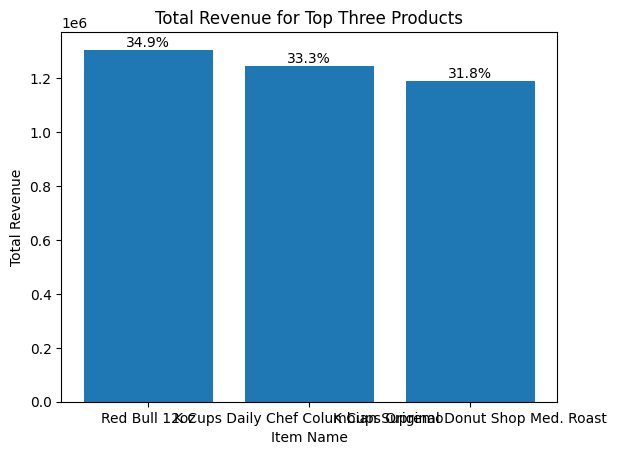

In [28]:
class TotalRevenueByProduct:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = '''
            SELECT ecom_schema.item_dim.item_name, sum(ecom_schema.fact_table.total_price) as total_revenue
            FROM ecom_schema.fact_table
            JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
            GROUP BY ecom_schema.item_dim.item_name
            ORDER BY total_revenue DESC
            LIMIT 3
        '''

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Item Name', 'Total Revenue'])

    def generate_visualization(self):
        # Calculate the percentage of total revenue for each product
        total_revenue = self.results_df['Total Revenue'].sum()
        self.results_df['Percentage'] = self.results_df['Total Revenue'] / total_revenue * 100

        # Create a bar plot with percentage labels
        fig, ax = plt.subplots()
        bars = ax.bar(self.results_df['Item Name'], self.results_df['Total Revenue'])
        ax.set_xlabel('Item Name')
        ax.set_ylabel('Total Revenue')
        ax.set_title('Total Revenue for Top Three Products')

        # Add percentage labels on top of the bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            percentage = self.results_df.loc[i, 'Percentage']
            ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{percentage:.1f}%', ha='center', va='bottom')

        plt.show()

    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()
        
        
# Access the class and execute the function
total_revenue_by_product = TotalRevenueByProduct()
total_revenue_by_product.execute_query()
total_revenue_by_product.generate_visualization()
total_revenue_by_product.close_connection()


#### 2. Total Sales by Year 

Connection to DB established!


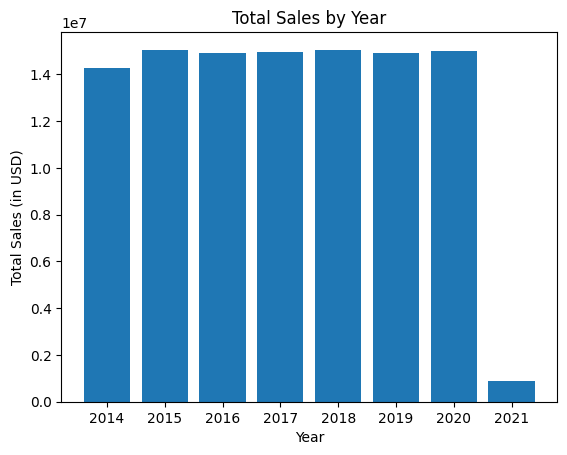

In [29]:
class TotalSalesByYear:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
        
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = '''
            SELECT time_dim.year AS year, SUM(fact_table.total_price) AS total_sales
            FROM ecom_schema.fact_table
            JOIN ecom_schema.time_dim ON fact_table.time_key = time_dim.time_key
            GROUP BY time_dim.year
            ORDER BY time_dim.year
        '''

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Year', 'Total Sales'])
        
    def generate_visualization(self):
        # Create a bar plot with total sales
        plt.bar(self.results_df['Year'], self.results_df['Total Sales'])
        plt.title('Total Sales by Year')
        plt.xlabel('Year')
        plt.ylabel('Total Sales (in USD)')
        plt.show()
        
    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()
        
total_sales_by_year = TotalSalesByYear()
total_sales_by_year.execute_query()
total_sales_by_year.generate_visualization()
total_sales_by_year.close_connection()


#### 3. Top 10 Customers by Total Revenue 

Connection to DB established!


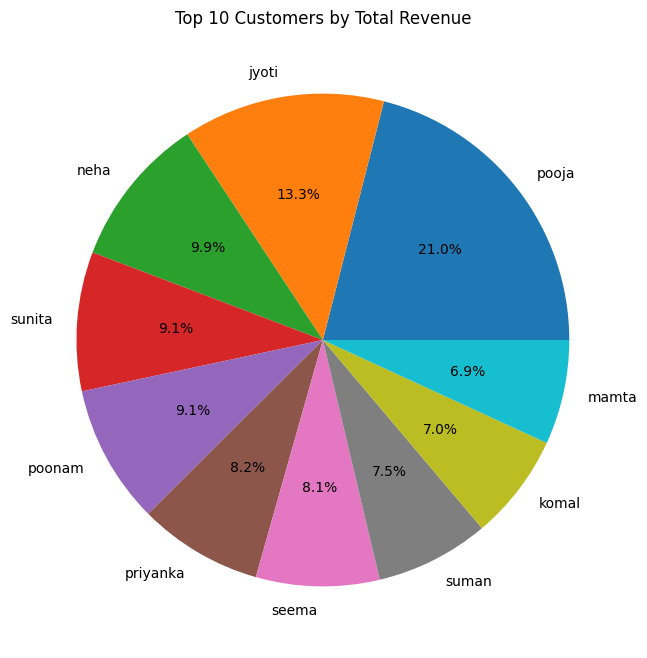

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

class TotalRevenueByCustomer:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = '''
            SELECT coustomer_dim.name, SUM(fact_table.total_price) AS total_revenue
            FROM ecom_schema.fact_table
            JOIN ecom_schema.coustomer_dim ON fact_table.coustomer_key = coustomer_dim.coustomer_key
            GROUP BY coustomer_dim.name
            ORDER BY total_revenue DESC
            LIMIT 10
        '''

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Customer Name', 'Total Revenue'])

    def generate_visualization(self):
        # Create a pie chart of the top 10 customers based on total revenue
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.pie(self.results_df['Total Revenue'], labels=self.results_df['Customer Name'], autopct='%1.1f%%')
        ax.set_title('Top 10 Customers by Total Revenue')

        plt.show()

    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()

# Access the class and execute the function
total_revenue_by_customer = TotalRevenueByCustomer()
total_revenue_by_customer.execute_query()
total_revenue_by_customer.generate_visualization()
total_revenue_by_customer.close_connection()


#### 4. Top 10 Items by Average Price and Revenue Over Time

Connection to DB established!


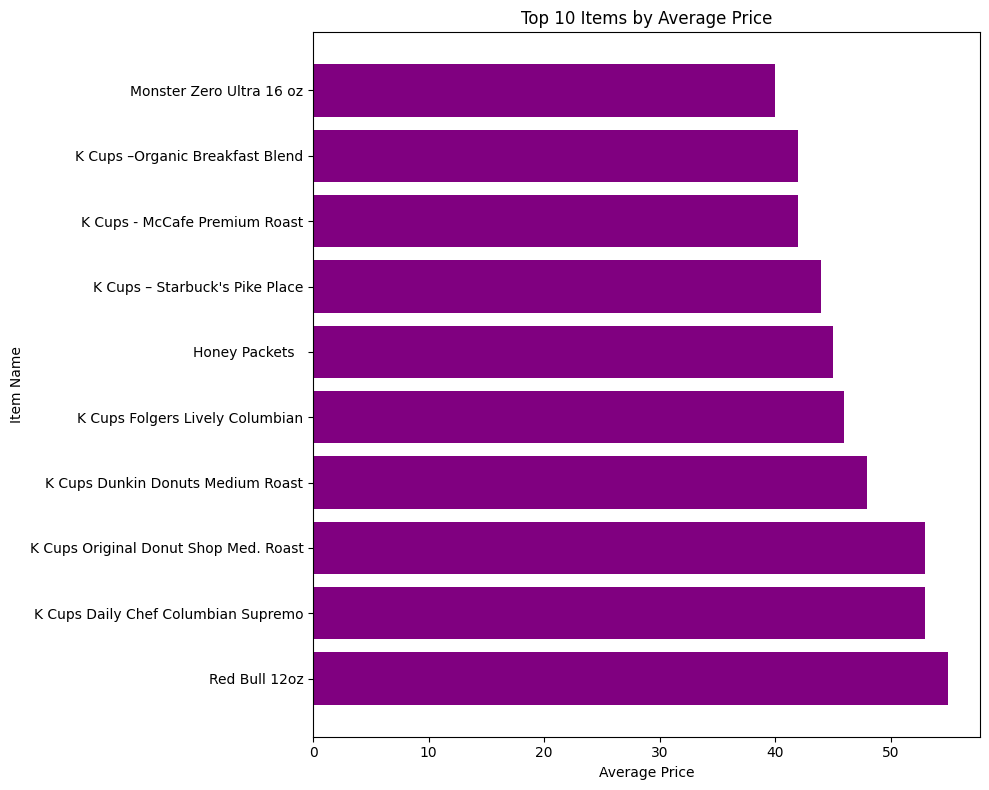

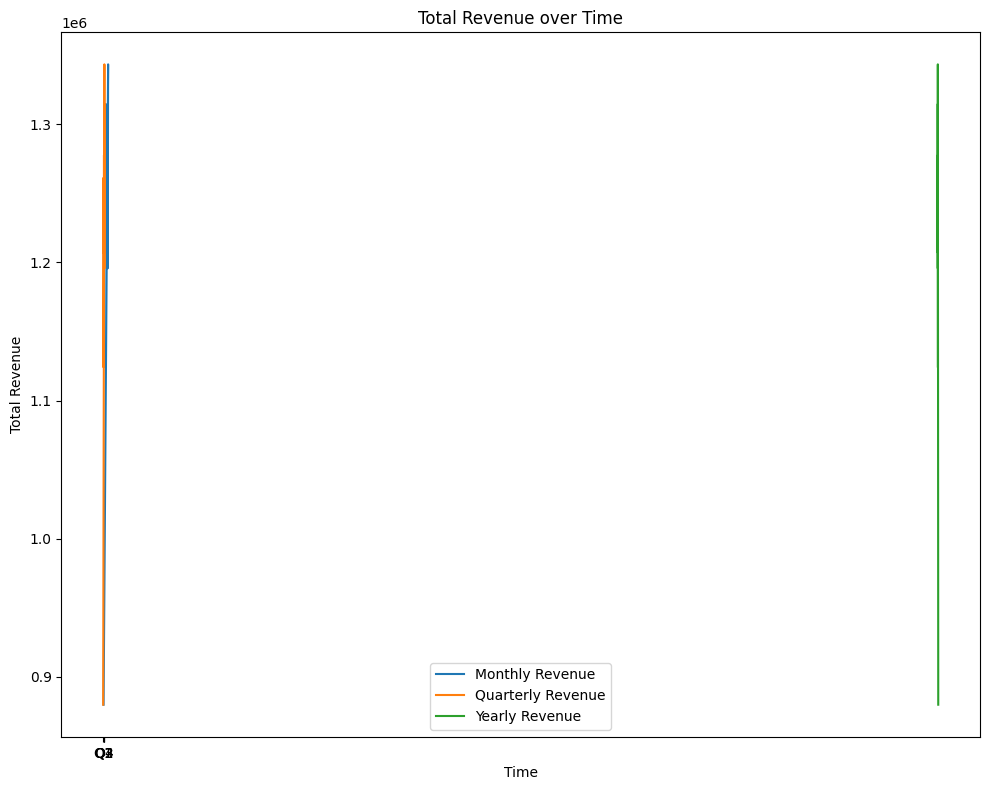

In [31]:
class FinancialAnalytics:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
        
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

       # Write the query for item dimension
        item_query = '''
            SELECT item_name, AVG(unit_price) AS average_price
            FROM ecom_schema.item_dim
            GROUP BY item_name
            ORDER BY average_price DESC
            LIMIT 10;
        '''

        # Write the query for time dimension
        time_query = '''
            SELECT year, quarter, month, SUM(total_price) AS total_revenue
            FROM ecom_schema.fact_table
            JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
            GROUP BY year, quarter, month
            ORDER BY year, quarter, month
        '''

        # Execute the query for item dimension
        self.cur.execute(item_query)

        # Fetch the results as a Pandas dataframe and save to self.item_results_df
        self.item_results_df = pd.DataFrame(self.cur.fetchall(), columns=['Item Name', 'Average Price'])

        # Execute the query for time dimension
        self.cur.execute(time_query)

        # Fetch the results as a Pandas dataframe and save to self.time_results_df
        self.time_results_df = pd.DataFrame(self.cur.fetchall(), columns=['Year', 'Quarter', 'Month', 'Total Revenue'])


    def generate_visualization(self):
        # Create a horizontal bar plot for item dimension
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.barh(self.item_results_df['Item Name'], self.item_results_df['Average Price'], color='purple')
        ax.set_xlabel('Average Price')
        ax.set_ylabel('Item Name')
        ax.set_title('Top 10 Items by Average Price')
        plt.tight_layout()
        plt.savefig('top_10_items.pdf')
        
        # Create a line plot for time dimension
        fig, ax = plt.subplots(figsize=(10, 8))
        
        # Filter the data to only show the last 12 months
        last_year_data = self.time_results_df.tail(12)
        
        ax.plot(last_year_data['Month'], last_year_data['Total Revenue'], label='Monthly Revenue')
        ax.plot(last_year_data['Quarter'], last_year_data['Total Revenue'], label='Quarterly Revenue')
        ax.plot(last_year_data['Year'], last_year_data['Total Revenue'], label='Yearly Revenue')
        ax.set_xlabel('Time')
        ax.set_ylabel('Total Revenue')
        ax.set_title('Total Revenue over Time')
        ax.legend()
        plt.tight_layout()
        plt.savefig('revenue_over_time.pdf')

    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()

# Access the class and execute the function
financial_analytics = FinancialAnalytics()
financial_analytics.execute_query()
financial_analytics.generate_visualization()
financial_analytics.close_connection()


#### 5. Distribution of Total Revenue by Customer

Connection to DB established!


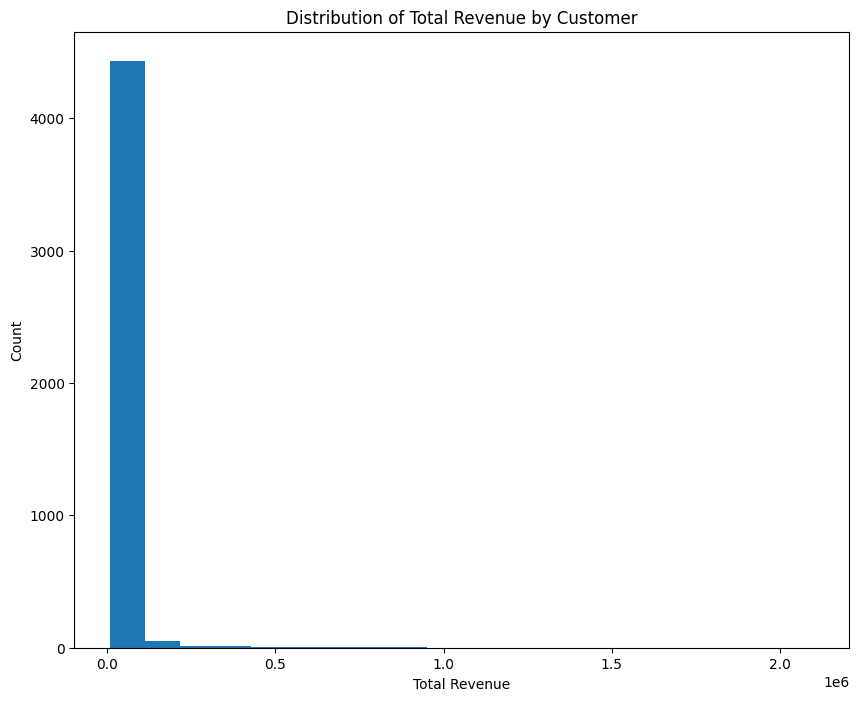

In [32]:
class TotalRevenueByCustomer:
    def __init__(self):
        self.con = None
        self.cur = None
        self.results_df = None
    
    def execute_query(self):
        # Establish database connection
        self.con = PostgresConnection().getConnection()
        self.cur = self.con.cursor()

        # Write the query
        query = '''
            SELECT coustomer_dim.name, SUM(fact_table.total_price) AS total_revenue
            FROM ecom_schema.fact_table
            JOIN ecom_schema.coustomer_dim ON fact_table.coustomer_key = coustomer_dim.coustomer_key
            GROUP BY coustomer_dim.name
            ORDER BY total_revenue DESC
        '''

        # Execute the query
        self.cur.execute(query)

        # Fetch the results as a Pandas dataframe
        self.results_df = pd.DataFrame(self.cur.fetchall(), columns=['Customer Name', 'Total Revenue'])

    def generate_visualization(self):
        # Create a histogram of total revenue
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.hist(self.results_df['Total Revenue'], bins=20)
        ax.set_xlabel('Total Revenue')
        ax.set_ylabel('Count')
        ax.set_title('Distribution of Total Revenue by Customer')
        plt.show()

    def close_connection(self):
        # Close the cursor and connection
        self.cur.close()
        self.con.close()

# Access the class and execute the function
total_revenue_by_customer = TotalRevenueByCustomer()
total_revenue_by_customer.execute_query()
total_revenue_by_customer.generate_visualization()
total_revenue_by_customer.close_connection()


# Assignment on Data Warehouse (DW)

Task 4: The following are the list of analytics:

1. store and time dimensional financial analytics,
2. customer and time dimensional financial analytics,
3. item and time dimensional financial analytics,
4. store and time dimensional inventory analytics,
5. item and time dimensional inventory analytics.

Every student must perform one of the above analytics. The number will selected
as follows:
((Left most 7 digit of your ID) mod 5) + 1


1. Left seven digit of my ID: 2315382
2. Take the modulus of this integer with 5: 2315382 % 5 = 2
3. Add 1 to the result of step 2: 2 + 1 = 3

Therefore, my task would be no 3—item and time dimensional financial analytics. So, let's move into the point 3.

# Exploratory Financial Analytics

The following Exploratory Data Analysis (EDA) techniques will be carried out on item and time dimensional financial analytics.


1. Total Sales over Time: A line plot showing the total sales for each date or time period over a specified range of time. This can give insights into trends, seasonality, and changes in sales over time.

2. Total Units Sold over Time: A line plot showing the total units sold for each date or time period over a specified range of time. This can give insights into trends, seasonality, and changes in demand over time.

3. Average Price per Unit over Time: A line plot showing the average price per unit for each date or time period over a specified range of time. This can give insights into changes in pricing strategies or customer behavior over time.

4. Top Selling Items: A bar chart showing the top selling items over a specified range of time. This can help identify which items are driving sales and potentially inform inventory management decisions.

5. Sales by Item Category: A pie chart or bar chart showing the breakdown of sales by item category over a specified range of time. This can help identify which categories are driving sales and potentially inform marketing or product development decisions.

6. Sales by Store Location: A map or bar chart showing the breakdown of sales by store location over a specified range of time. This can help identify which locations are driving sales and potentially inform expansion or marketing decisions.

7. Sales by Payment Type: A pie chart or bar chart showing the breakdown of sales by payment type over a specified range of time. This can help identify which payment methods are most popular and potentially inform payment processing decisions.

# Apply the Financial Analytics Techniques (1,2, and 3)

In [34]:
def total_sales_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT date_trunc('day', time_dim.date) as date, SUM(fact_table.total_price) as total_sales
    FROM ecom_schema.fact_table
    JOIN ecom_schema.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY date_trunc('day', time_dim.date)
    ORDER BY date_trunc('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'total_sales'])
    conn.close()
    return df

def total_units_sold_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT date_trunc('day', time_dim.date) as date, SUM(fact_table.quantity) as total_units
    FROM ecom_schema.fact_table
    JOIN ecom_schema.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY date_trunc('day', time_dim.date)
    ORDER BY date_trunc('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'total_units'])
    conn.close()
    return df

def avg_price_per_unit_over_time():
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = '''
    SELECT date_trunc('day', time_dim.date) as date, AVG(fact_table.unit_price) as avg_price_per_unit
    FROM ecom_schema.fact_table
    JOIN ecom_schema.time_dim ON fact_table.time_key = time_dim.time_key
    GROUP BY date_trunc('day', time_dim.date)
    ORDER BY date_trunc('day', time_dim.date)
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['date', 'avg_price_per_unit'])
    conn.close()
    return df

def plot_total_sales_over_time():
    df = total_sales_over_time()
    plt.plot(df['date'], df['total_sales'])
    plt.title('Total Sales over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()

def plot_total_units_sold_over_time():
    df = total_units_sold_over_time()
    plt.plot(df['date'], df['total_units'])
    plt.title('Total Units Sold over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Units Sold')
    plt.show()

def plot_avg_price_per_unit_over_time():
    df = avg_price_per_unit_over_time()
    plt.plot(df['date'], df['avg_price_per_unit'])
    plt.title('Average Price per Unit over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price per Unit')
    plt.show()


Connection to DB established!
Connection to DB established!
Connection to DB established!
Connection to DB established!


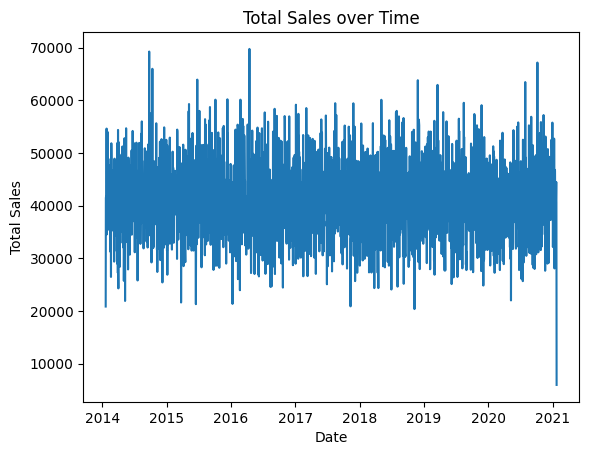

Connection to DB established!


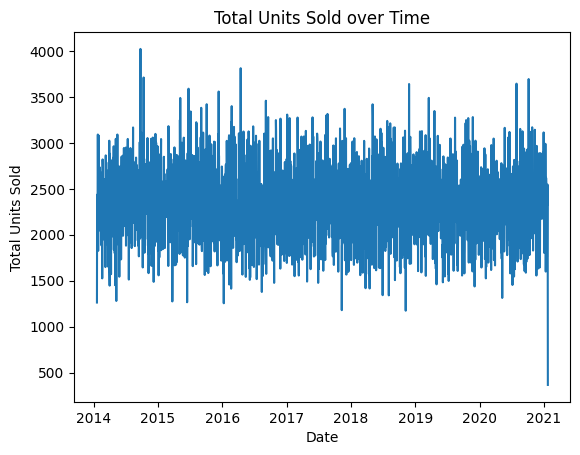

Connection to DB established!


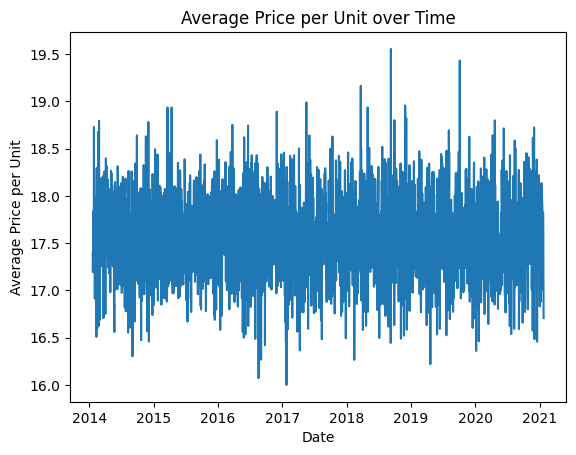

In [35]:
total_sales_over_time()
total_units_sold_over_time()
avg_price_per_unit_over_time()
plot_total_sales_over_time()
plot_total_units_sold_over_time()
plot_avg_price_per_unit_over_time()

# Financial Analytics Technique 4 (Top Selling Items)

Connection to DB established!


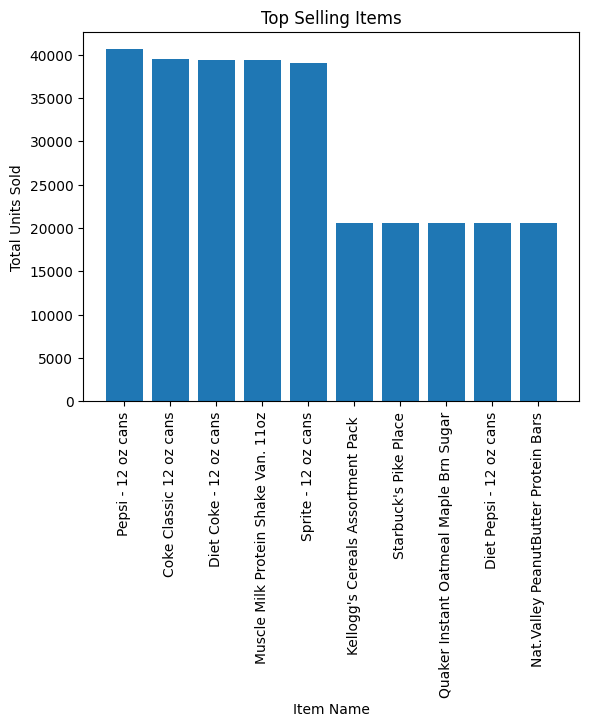

In [36]:
def top_selling_items(start_date, end_date):
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = f'''
    SELECT item_dim.item_name, SUM(ecom_schema.fact_table.quantity) as total_units_sold
    FROM ecom_schema.fact_table
    JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
    JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
    WHERE ecom_schema.time_dim.date::date BETWEEN '{start_date}'::date AND '{end_date}'::date
    GROUP BY ecom_schema.item_dim.item_name
    ORDER BY total_units_sold DESC
    LIMIT 10
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['item_name', 'total_units_sold'])
    conn.close()
    plt.bar(df['item_name'], df['total_units_sold'])
    plt.title('Top Selling Items')
    plt.xlabel('Item Name')
    plt.ylabel('Total Units Sold')
    plt.xticks(rotation=90)

    plt.show()

# set the start and end dates
start_date = '2015-01-01'
end_date = '2023-04-19'

# call the function with the specified date range
top_selling_items(start_date, end_date)


# Financial Analytics Technique 5 (Top selling items)

Connection to DB established!


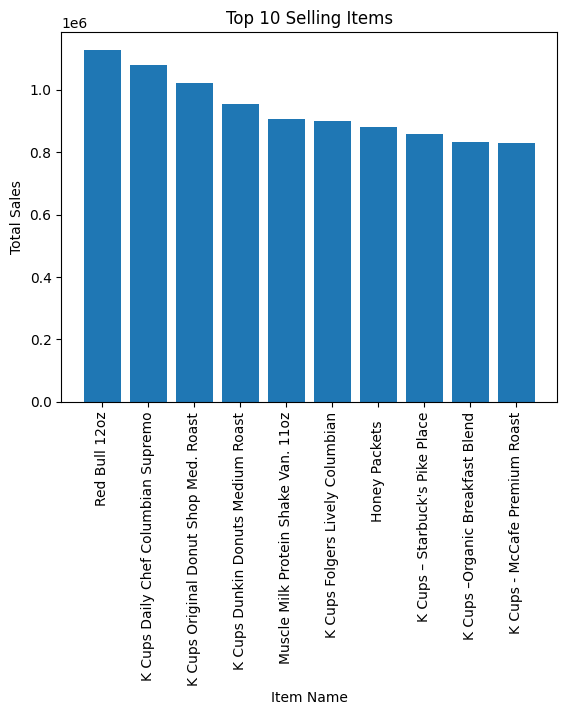

In [37]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

def top_selling_items(start_date, end_date):
    conn = PostgresConnection().getConnection()
    cur = conn.cursor()
    query = f'''
        SELECT ecom_schema.item_dim.item_name, SUM(ecom_schema.fact_table.total_price) as total_sales
        FROM ecom_schema.fact_table
        INNER JOIN ecom_schema.item_dim ON ecom_schema.fact_table.item_key = ecom_schema.item_dim.item_key
        INNER JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
        WHERE ecom_schema.time_dim.date BETWEEN '{start_date}' AND '{end_date}'
        GROUP BY ecom_schema.item_dim.item_name
        ORDER BY total_sales DESC
        LIMIT 10
    '''
    cur.execute(query)
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['item_name', 'total_sales'])
    conn.close()

    # plot the bar chart
    plt.bar(df['item_name'], df['total_sales'])
    plt.xticks(rotation=90)
    plt.xlabel('Item Name')
    plt.ylabel('Total Sales')
    plt.title('Top 10 Selling Items')
    plt.show()

    
    
start_date = '2015-01-01'
end_date = '2023-04-19'
top_selling_items(start_date, end_date)


# Financial Analytics Technique 6 (Sales by Store Location)

Connection to DB established!


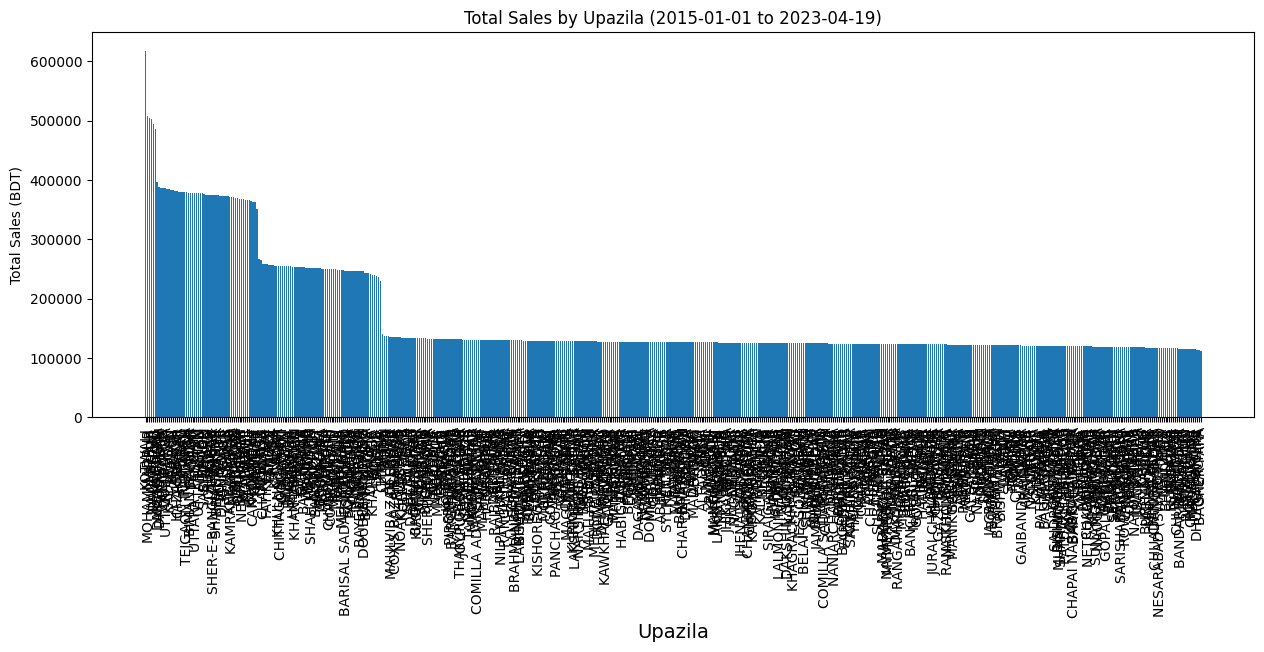

In [38]:
import geopandas as gpd
from shapely.geometry import Point

def sales_by_store_location(start_date, end_date, chart_type='bar'):
    # connect to database
    conn = PostgresConnection().getConnection()
    
    # create cursor
    cur = conn.cursor()
    
    # build SQL query
    query = f'''
        SELECT ecom_schema.store_dim.upazila, SUM(ecom_schema.fact_table.total_price) as total_sales
        FROM ecom_schema.fact_table
        JOIN ecom_schema.store_dim ON ecom_schema.fact_table.store_key = ecom_schema.store_dim.store_key
        JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
        WHERE ecom_schema.time_dim.date BETWEEN '{start_date}' AND '{end_date}'
        GROUP BY ecom_schema.store_dim.upazila
        ORDER BY total_sales DESC
        '''
    
    # execute SQL query
    cur.execute(query)
    
    # fetch query results and create dataframe
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['upazila_name', 'total_sales'])
    
    # create map or bar chart based on chart_type parameter
    if chart_type == 'map':
        # read shapefile for upazila boundaries
        upazila_shapefile = gpd.read_file('upazilas.shp')
        
        # create Point objects for each upazila's centroid
        df['geometry'] = df['upazila_name'].apply(lambda x: Point(upazila_shapefile[upazila_shapefile['NAME_3']==x].centroid))
        
        # create geodataframe from the dataframe and the upazila shapefile
        gdf = gpd.GeoDataFrame(df, geometry='geometry')
        
        # join the sales data to the upazila shapefile
        upazila_sales = upazila_shapefile.merge(gdf, on='upazila_name')
        
        # create map of total sales by upazila
        fig, ax = plt.subplots(figsize=(10,10))
        ax.axis('off')
        ax.set_title(f'Total Sales by Upazila ({start_date} to {end_date})', fontdict={'fontsize': '18', 'fontweight' : '3'})
        upazila_sales.plot(column='total_sales', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
        
    elif chart_type == 'bar':
        # create bar chart of total sales by upazila
        plt.figure(figsize=(15,5))
        plt.bar(df['upazila_name'], df['total_sales'])
        plt.title(f'Total Sales by Upazila ({start_date} to {end_date})')
        plt.xlabel('Upazila', fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Total Sales (BDT)')
        plt.show()
    
    # close database connection
    cur.close()
    conn.close()

start_date = '2015-01-01'
end_date = '2023-04-19'
sales_by_store_location(start_date, end_date)


# Financial Analytics Technique 7 (Sales by Payment Type)

In [39]:
import geopandas as gpd
from shapely.geometry import Point

def sales_by_payment_type(start_date, end_date, chart_type='bar'):
    # connect to database
    conn = PostgresConnection().getConnection()
    
    # create cursor
    cur = conn.cursor()
    
    # build SQL query
    query = f'''
        SELECT ecom_schema.trans_dim.trans_type, SUM(ecom_schema.fact_table.total_price) as total_sales
        FROM ecom_schema.fact_table
        JOIN ecom_schema.trans_dim ON ecom_schema.fact_table.payment_key = ecom_schema.trans_dim.payment_key
        JOIN ecom_schema.time_dim ON ecom_schema.fact_table.time_key = ecom_schema.time_dim.time_key
        WHERE ecom_schema.time_dim.date BETWEEN '{start_date}' AND '{end_date}'
        GROUP BY ecom_schema.trans_dim.trans_type
        ORDER BY total_sales DESC
        '''
    
    # execute SQL query
    cur.execute(query)
    
    # fetch query results and create dataframe
    results = cur.fetchall()
    df = pd.DataFrame(results, columns=['payment_type', 'total_sales'])
    
    # create pie chart or bar chart based on chart_type parameter
    if chart_type == 'pie':
        # create pie chart of total sales by payment type
        plt.figure(figsize=(8,8))
        plt.pie(df['total_sales'], labels=df['payment_type'], autopct='%1.1f%%', startangle=90)
        plt.title(f'Total Sales by Payment Type ({start_date} to {end_date})')
        plt.show()
        
    elif chart_type == 'bar':
        # create bar chart of total sales by payment type
        plt.figure(figsize=(10,5))
        plt.bar(df['payment_type'], df['total_sales'])
        plt.title(f'Total Sales by Payment Type ({start_date} to {end_date})')
        plt.xlabel('Payment Type')
        plt.xticks(rotation=45)
        plt.ylabel('Total Sales (BDT)')
        plt.show()
    
    # close database connection
    cur.close()
    conn.close()


Connection to DB established!


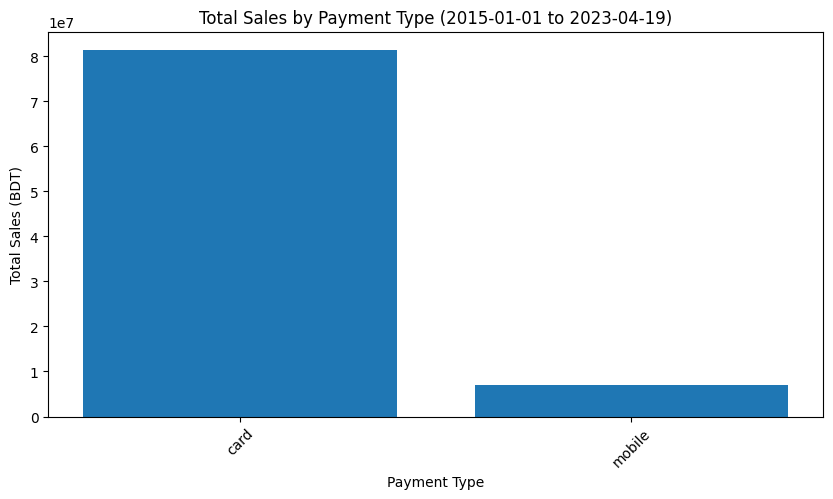

In [40]:
start_date = '2015-01-01'
end_date = '2023-04-19'
chart_type = 'bar' 
sales_by_payment_type(start_date, end_date, chart_type)